# Hassediagram-Editor

- You will find some example data files and generate Hassediagrams.
- Parameters like colors and selected nodes can be set as you like.

### Configuration for D3

In [1]:
from IPython.core.display import HTML
import hd3d_lib
HTML('<script src="lib/d3/d3.min.js"></script>')

### Import modules

In [2]:
import pathlib
from pyhasse.core.csv_io import CSVReader
from pyhasse.core.hddata import HDData
import json
import random
from IPython.core.display import display, HTML
import random
#random.seed(42)
from string import Template

### Daten importieren und für PyHasse-Berechungen vorbereiten

In [3]:
# TESTFILENAME = '/csvdata/a-equiv.txt'
# TESTFILENAME = '/csvdata/similarity-01-milk.txt'
# TESTFILENAME = '/csvdata/spyout-demo.csv'
# TESTFILENAME = '/csvdata/acm-houses.csv'
# TESTFILENAME = '/csvdata/chain-pollution.csv'
# TESTFILENAME = '/csvdata/chain-sample.csv'
# TESTFILENAME = '/csvdata/chaindivlength3.txt'
# TESTFILENAME = '/csvdata/copeland_outrk.csv'
# TESTFILENAME = '/csvdata/fuzzy-demo.csv'
# TESTFILENAME = '/csvdata/main19chemicals.csv'
# TESTFILENAME = '/csvdata/pesticides.txt'
TESTFILENAME = '/csvdata/spyout-demo.csv'


HERE = pathlib.Path('__file__').parent
csv = CSVReader(fn=str(HERE) + TESTFILENAME, ndec=3)
red = csv.calc_reduced_system()

### Daten für Hasse-Diagramm berechnen

In [4]:
hd = HDData(csv)
data_dict = hd.jsondata()
data_dict['dmred'] = csv.dmred
data_dict['lst_downsets'] = []
data_dict['lst_upsets'] = []
data_dict['lst_incomparables'] = []

data =''
for key, value in data_dict.items():
    data += "var " + key + " = " + json.dumps(value)+";\n"
    
settings = {
    "preselected": [],
    "arrowShow": 1,
    "unselectedHide": 0,
    "edgeHighlight": 1,
    "arrowWidth": 20,
    "arrowSideRight": 1,
    "unselectedNodeColor": "#ff0000",
    "selectedNodeColor": "#ffbfff",
    "arrowColor": "#ff0000",
    "textColor": "#000000",
    "lineColor": "#FFF",
    "selectedBkgColor": "#008",
    "bkgGradient1": "#2db4ff",
    "bkgGradient2": "#2db4ff",
    "shortLength": 4,
    "hNodeDist": 2,
    "vNodeDist": 2,
    "r": 20,
    "bkgR": 20 + 15,
    "frameHeight": 600
}

data_dict.update(settings)

for key, value in settings.items():
    data += "var " + key + " = " + json.dumps(value) +";\n"

# Draw Hasse-Diagram
### Navigation
- zoom (smooth) -- *Mouse-Wheel*
- zoom to node -- *Right-Click* on node
- move the diagram -- *Click+Drag*
- move a node -- *Click on node+Drag*
- select one node -- *Click*
- toggle a node's selection or select multiple nodes -- *Shift+Click*


In [5]:
HTML(hd3d_lib.draw_hasse('diagramd3_editor', data_dict))

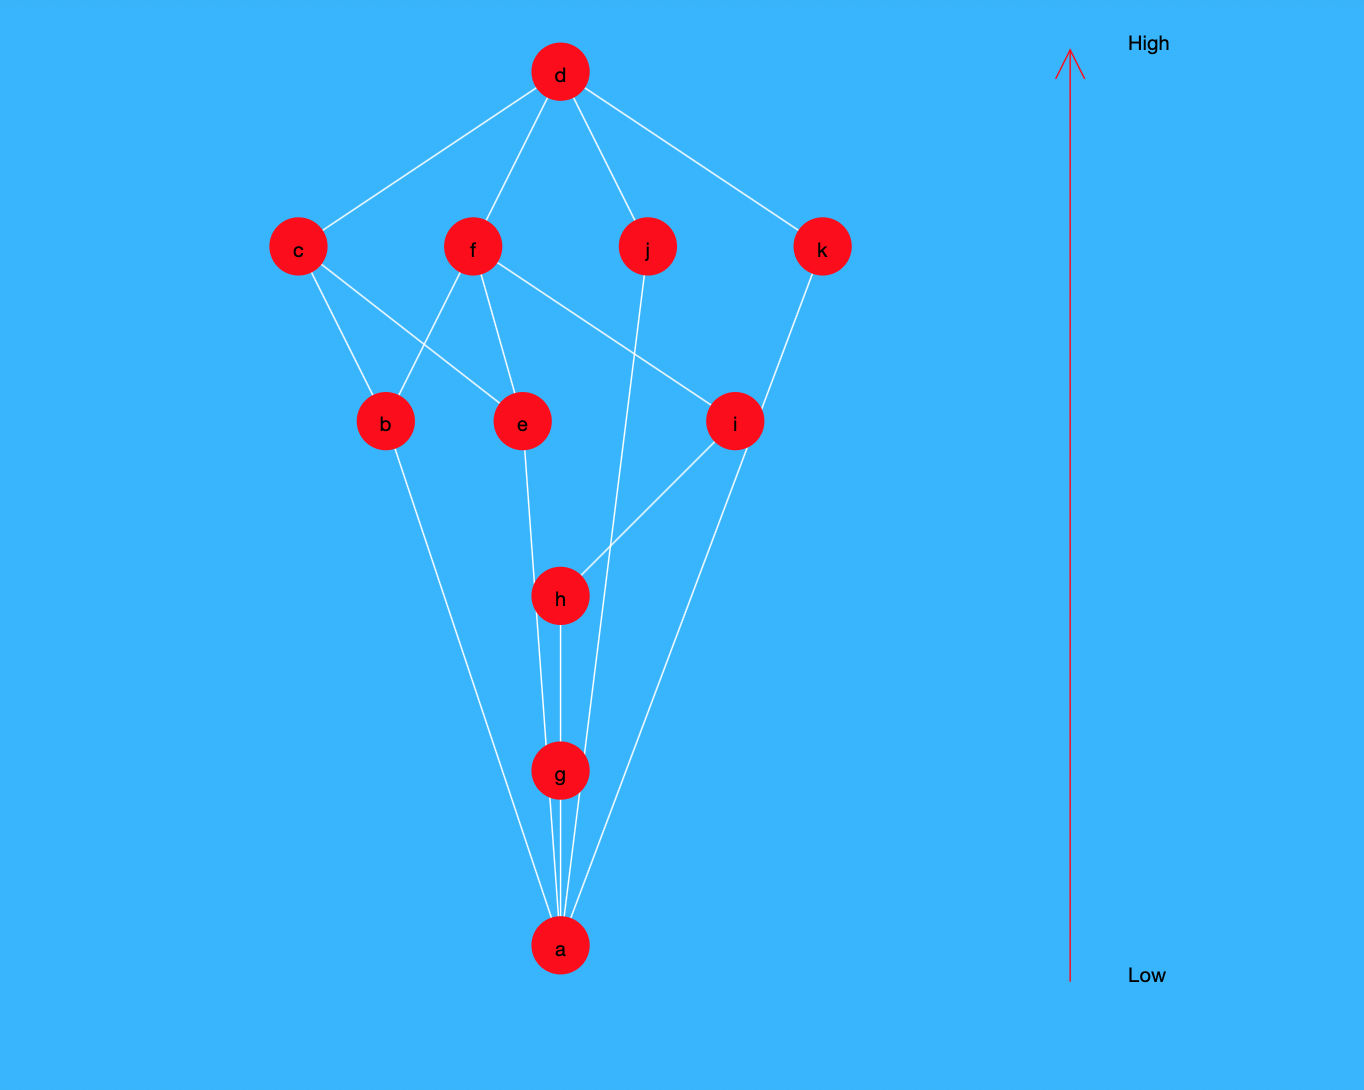